# Images Preprocessing 

## About dataset
There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

The dataset is organized into 3 folders:
* train 
* test
* val 


Each folder contains subfolders for each image category:
* Pneumonia
* Normal 

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

**For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans.** The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

In [77]:
# Importing the necessary libraries
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import os
import sys
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

import time
import scipy
from PIL import Image

from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


In [78]:
# set file path for x-ray
test_folder = 'data/test'
train_folder = 'data/train'
val_folder = 'data/val'

In [79]:
#files names
pth_normal_train = "data/train/NORMAL/"
pth_pneumonia_train = "data/train/PNEUMONIA/"
pth_normal_test = "data/test/NORMAL/"
pth_pneumonia_test = "data/test/PNEUMONIA/"
pth_normal_val = "data/val/NORMAL/"
pth_pneumonia_val = "data/val/PNEUMONIA/"

normal_img = glob(pth_normal + "*.jpeg")
pneumonia_img = glob(pth_pneumonia + "*.jpeg")

file_list = [pth_normal_train, pth_pneumonia_train, pth_normal_test, pth_pneumonia_test, pth_normal_val, pth_pneumonia_val]

summ = 0
for i in range(0,len(file_list)):
    files = glob(file_list[i] + "*.jpeg")
    summ += len(glob(file_list[i] + "*.jpeg"))
    print(len(glob(file_list[i] + "*.jpeg")))

print(summ)
#print(normal_img)
#print(pneumonia_img)

1341
3875
234
390
8
8
5856


In [80]:
#files names
pth_normal_train = "data/chest_xray/train/NORMAL/"
pth_pneumonia_train = "data/chest_xray/train/PNEUMONIA/"
pth_normal_test = "data/chest_xray/test/NORMAL/"
pth_pneumonia_test = "data/chest_xray/test/PNEUMONIA/"
pth_normal_val = "data/chest_xray/val/NORMAL/"
pth_pneumonia_val = "data/chest_xray/val/PNEUMONIA/"

normal_img = glob(pth_normal + "*.jpeg")
pneumonia_img = glob(pth_pneumonia + "*.jpeg")

file_list = [pth_normal_train, pth_pneumonia_train, pth_normal_test, pth_pneumonia_test, pth_normal_val, pth_pneumonia_val]

summ = 0
for i in range(0,len(file_list)):
    files = glob(file_list[i] + "*.jpeg")
    summ += len(glob(file_list[i] + "*.jpeg"))
    print(len(glob(file_list[i] + "*.jpeg")))

print(summ)

1341
3875
234
390
8
8
5856


In [81]:
len(normal_img)

1341

In [82]:
len(pneumonia_img)

3875

In [83]:
# get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder, 
        target_size=(64, 64), batch_size = 624 ) 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(val_folder, 
        target_size=(64, 64), batch_size = 16)

# get all the data in the directory split/train (542 images), and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(train_folder, 
        target_size=(64, 64), batch_size = 5216)

Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [84]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

JPEG
L
(1857, 1317)


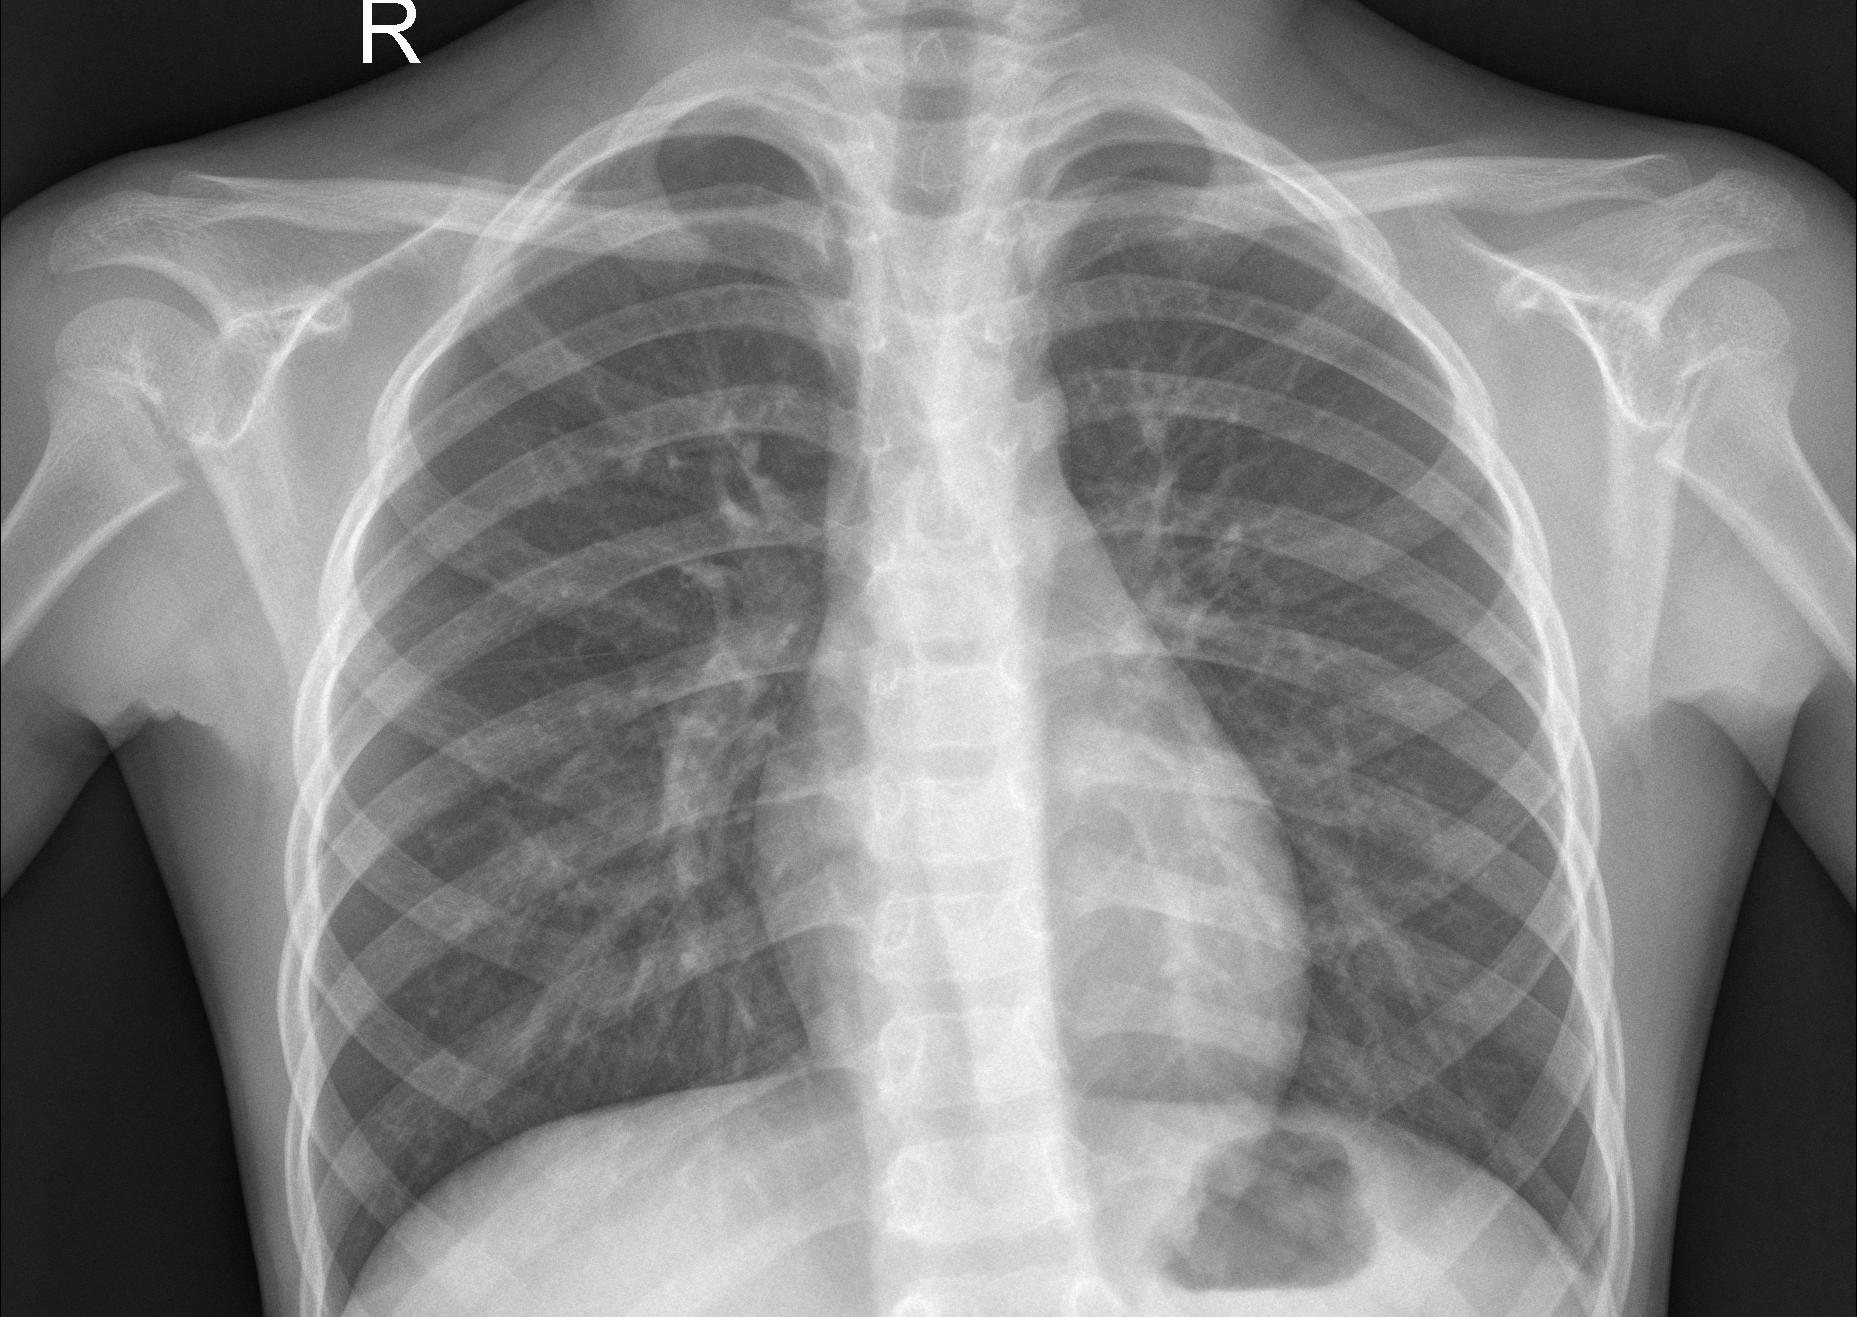

In [85]:
# Let's check our images. 
im = Image.open(r'data/test/NORMAL/IM-0001-0001.jpeg') 
#Get basic details about the image
print(im.format)
print(im.mode)
print(im.size)
display(im)
#im.show() 

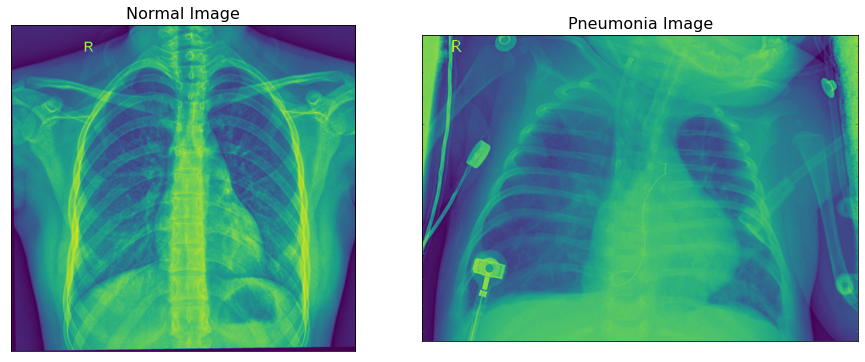

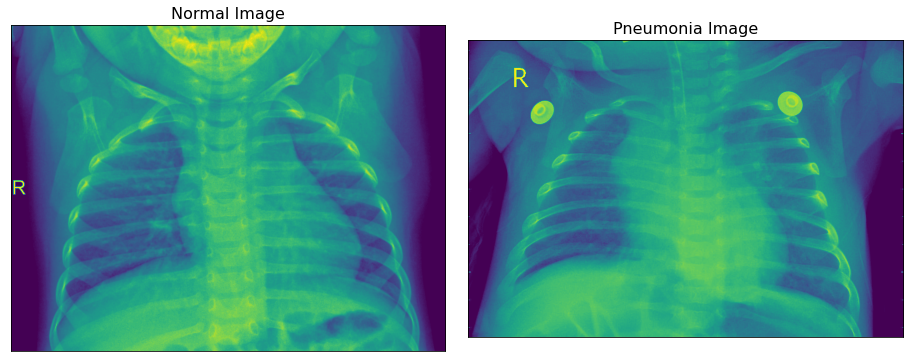

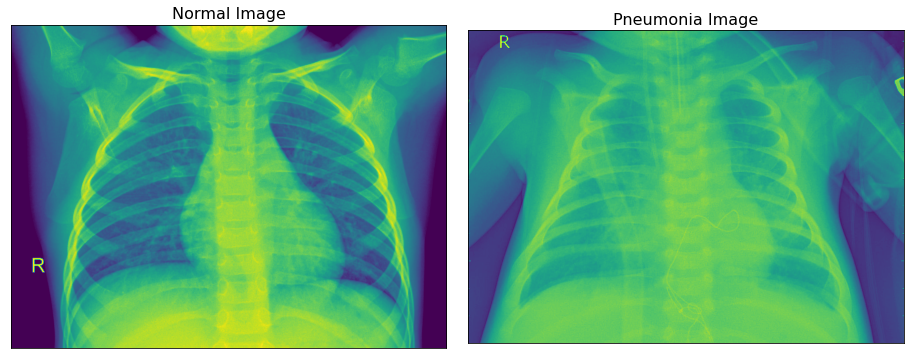

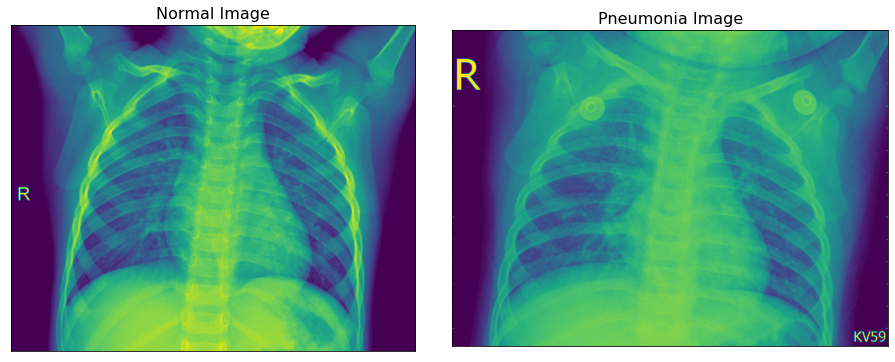

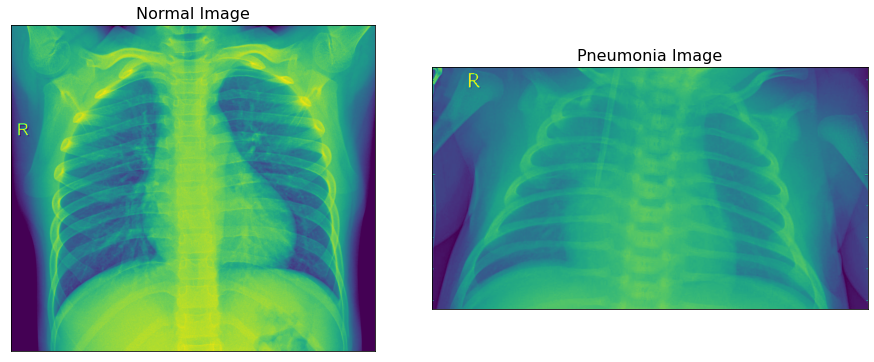

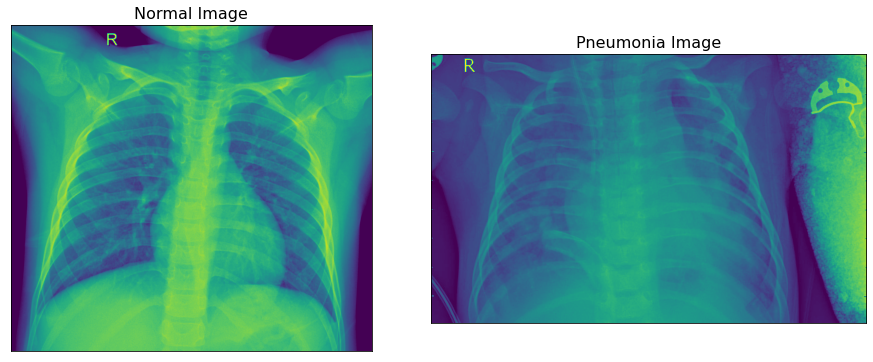

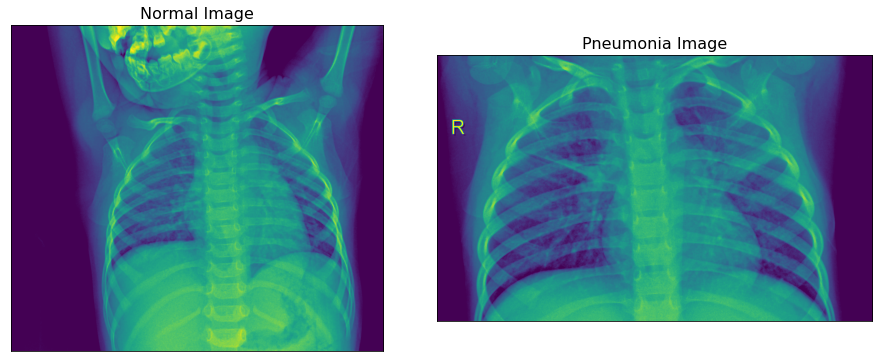

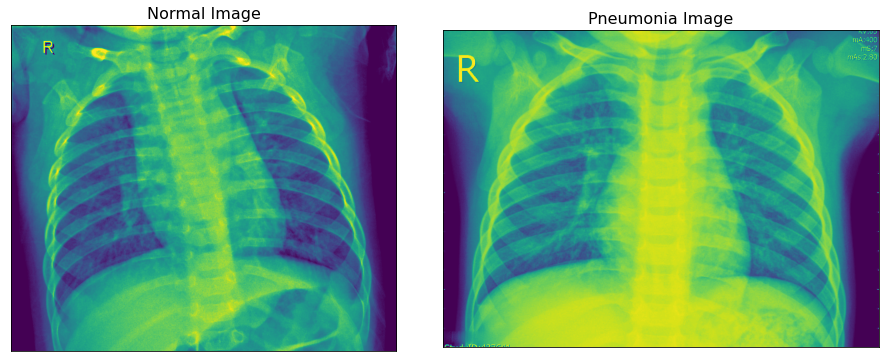

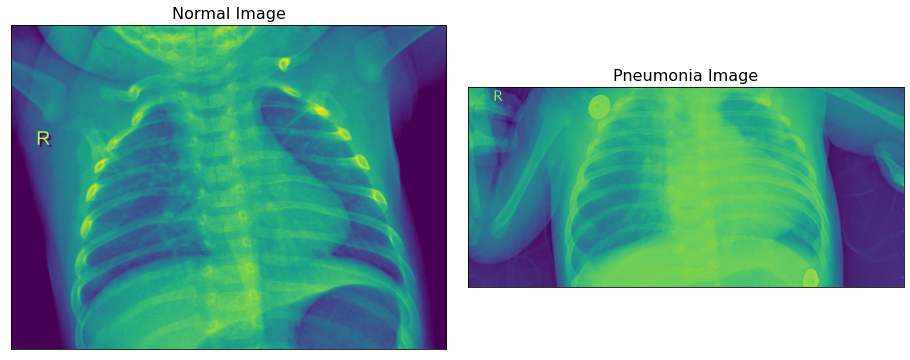

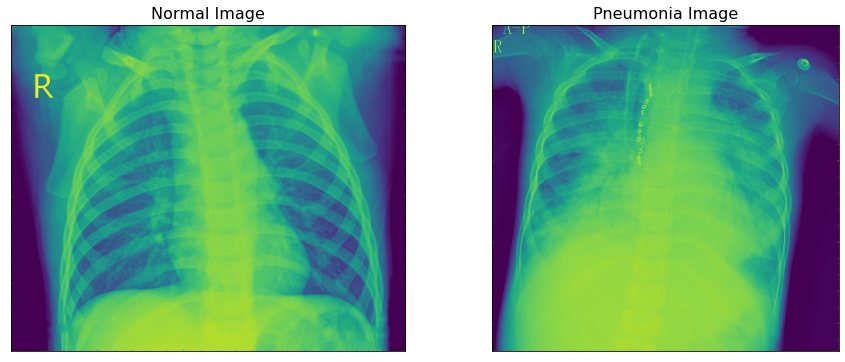

In [86]:
# Visual cheking 
for i in range(0,10):
    im_n = Image.open(normal_img[i]) 
    im_p = Image.open(pneumonia_img[i]) 
    fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(im_n)
    ax[0].set_title('Normal Image', size=16)
    ax[1].imshow(im_p)
    ax[1].set_title('Pneumonia Image', size=16)

How we can see all images a clean , we don't have any black stops, jewelry, medical equipment

In [88]:
l = []
for i in test_generator:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)    

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()